# Long-lived Bug Prediction with Deep Learning

# 1. Setup environment.

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal

%matplotlib inline 

pd.set_option('display.max_columns', None)

data_evaluation_path  = "../../data/processed/20200516212507-long-lived-bug-prediction-w-dnn-results.csv"
print("Setup complete")

Setup complete


# 2. Load data.

In [3]:
!echo "\nHeader of metrics file $data_results_path"
!head -n 2 $data_evaluation_path

!echo "\nNumber of lines in the file $data_results_path"
!wc -l $data_evaluation_path


\nHeader of metrics file 
#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
0,eclipse,long_description,lstm+emb,smote,-,val_accuracy,8,100,5880,2940,2940,1470,735,735,2444,1225,1219,0.6905812621116638,1292.0,1152.0,1292.0,1152.0,0.5286415815353394,0.5286415815353394,0.5286415815353394,0.5441259145736694,0.5286415711947627,0.5286415711947627,0.5286065861947732,0.5286415815353394,200
\nNumber of lines in the file 
21 ../../data/processed/20200516212507-long-lived-bug-prediction-w-dnn-results.csv


In [4]:
# read metrics data.
data_evaluation = pd.read_csv(data_evaluation_path, sep=',', decimal='.')
rows_and_cols = data_evaluation.shape
print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {data_evaluation_path}.\n")

There are 20 rows and 32 columns in ../../data/processed/20200516212507-long-lived-bug-prediction-w-dnn-results.csv.



# 3. First Experiment

## Parameters

| Parameter                  |         Value        |
|----------------------------|:--------------------:|
| Project                    |        Eclipse       |
| Algorithms                 |        lstm+emb |
| Metrics                    | Accuracy |
| Features                   | Long Description |
| Number of Terms            |        100, 150, 200, 250, 300       |
| Balancing                  |        Smote   |
| Resampling                 |        Repeated CV 5 x 2       |
| Threshold                  |        8 (median), 63 (average) , 108 (3rd quartil), 365        |


## 3.1 Review the data

### Best Balanced Accuracy Scores

In [5]:
data_evaluation.sort_values('balanced_acc', ascending=False).head()

,#,project,feature,classifier,balancing,resampling,metric,threshold,terms,train_size,train_size_class_0,train_size_class_1,val_size,val_size_class_0,val_size_class_1,test_size,test_size_class_0,test_size_class_1,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,sensitivity,specificity,balanced_acc,fmeasure,epochs
2,2,eclipse,long_description,lstm+emb,smote,-,val_accuracy,8,200,5880,2940,2940,1470,735,735,2444,1225,1219,0.691510,1322.0,1122.0,1322.0,1122.0,0.540917,0.540917,0.540917,0.546239,0.540917,0.540917,0.540888,0.540917,200
4,4,eclipse,long_description,lstm+emb,smote,-,val_accuracy,8,300,5880,2940,2940,1470,735,735,2444,1225,1219,0.690039,1315.0,1129.0,1315.0,1129.0,0.538052,0.538052,0.538052,0.549142,0.538052,0.538052,0.538137,0.538052,200
8,8,eclipse,long_description,lstm+emb,smote,-,val_accuracy,63,250,8802,4401,4401,2200,1100,1100,2444,1833,611,3.373760,1027.0,1417.0,1027.0,1417.0,0.420213,0.420213,0.420213,0.330910,0.420213,0.420213,0.533824,0.420213,200
3,3,eclipse,long_description,lstm+emb,smote,-,val_accuracy,8,250,5880,2940,2940,1470,735,735,2444,1225,1219,0.691460,1303.0,1141.0,1303.0,1141.0,0.533142,0.533142,0.533142,0.545663,0.533142,0.533142,0.533147,0.533142,200
7,7,eclipse,long_description,lstm+emb,smote,-,val_accuracy,63,200,8802,4401,4401,2200,1100,1100,2444,1833,611,3.216378,1056.0,1388.0,1056.0,1388.0,0.432079,0.432079,0.432079,0.340089,0.432079,0.432079,0.532460,0.432079,200


## 3.2 Evaluation Metrics

### Balanced Accuracy
Accurácia balanceada: (sensitivity + specificity)/2

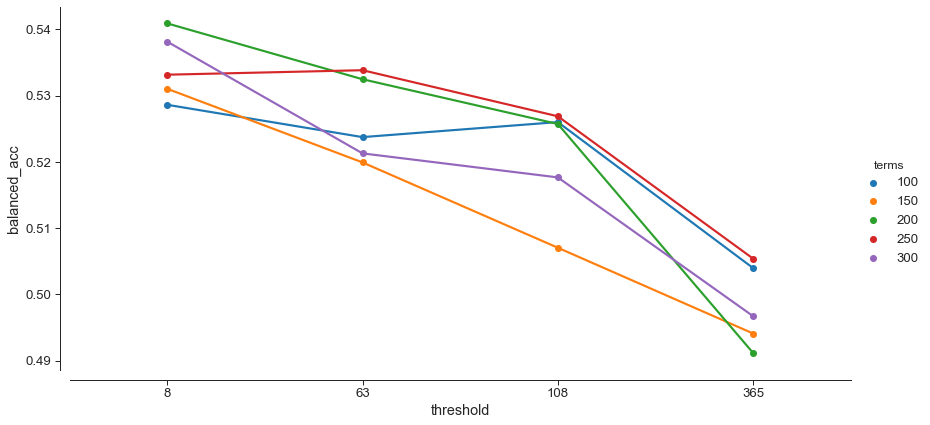

In [13]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style("ticks", {'axes.grid' : False})
data_evaluation.threshold = data_evaluation['threshold'].astype(str)
data_evaluation.terms = data_evaluation['terms'].astype(str)

g = sns.catplot(data=data_evaluation, x="threshold", y="balanced_acc"
                , hue="terms", kind="point", height=6
                , aspect=2, order=['8', '63', '108', '365'])
sns.despine(offset=10)